# **Part 1**

In [7]:
import numpy as np
import matplotlib.pyplot as plt

uniform_array = np.random.uniform(0, 1, 100)
gaussian_array = np.random.normal(loc=50, scale=15, size=200)


1.

<ipython-input-8-76b95cee8a4f>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([uniform_array, gaussian_array], labels=["Uniform", "Gaussian"])


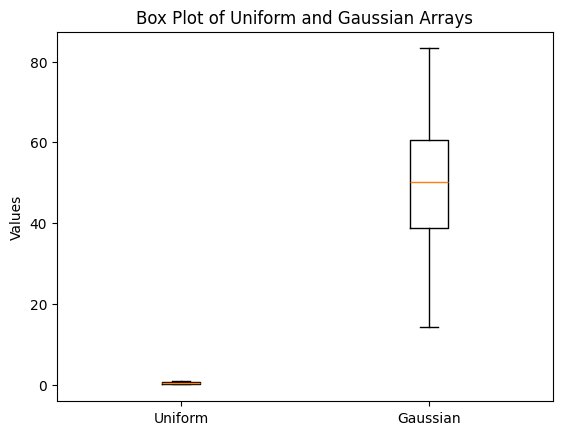

In [8]:
plt.boxplot([uniform_array, gaussian_array], labels=["Uniform", "Gaussian"])
plt.title("Box Plot of Uniform and Gaussian Arrays")
plt.ylabel("Values")
plt.show()


The box plot visualizes the distribution of two datasets:

**Uniform Distribution (Left Box - "Uniform")**

*  The values are between 0 and 1.
*   The box is very small, indicating a narrow range of data.
*   The median is near 0.5, as expected in a uniform distribution.
*   There are no significant outliers because the data is evenly spread.


**Gaussian Distribution (Right Box - "Gaussian")**

*   The values are generated with a Gaussian (normal) distribution between 1 and 100.
*   The box is much larger, indicating a wider spread of values compared to the uniform distribution.
*   The median is around the center of the distribution.
*   The whiskers extend from a lower bound (minimum) to an upper bound (maximum), with some potential outliers beyond these limits.


**Key Observations**
*   The uniform dataset has a much smaller range (0 to 1), leading to a tightly packed box.

*  The Gaussian dataset spans a much larger range, with values spread over a wider interval (approximately 1 to 100).
*   The interquartile range (IQR) is much larger for the Gaussian dataset, reflecting the natural variability in normally distributed data.
*  The median (orange line) in both distributions represents the central value.


This visualization highlights the difference between a narrow, evenly distributed dataset (Uniform) and a widely spread, bell-shaped dataset (Gaussian).

2.

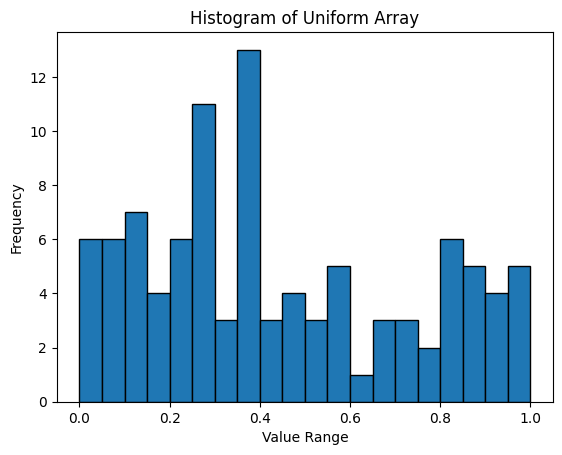

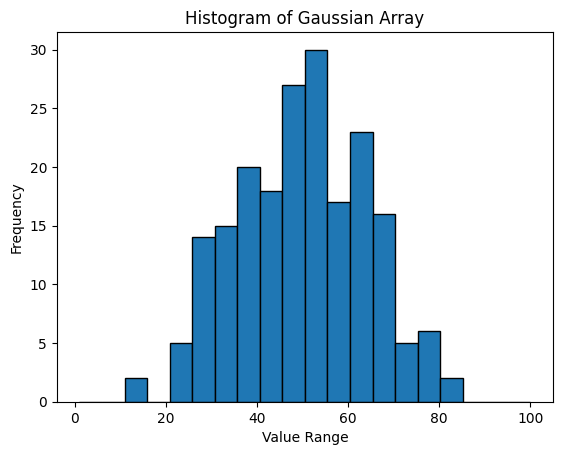

In [9]:
bins = np.linspace(0, 1, 21)
uniform_hist, _ = np.histogram(uniform_array, bins=bins)

gaussian_bins = np.linspace(1, 100, 21)
gaussian_hist, _ = np.histogram(gaussian_array, bins=gaussian_bins)
plt.bar(bins[:-1], uniform_hist, width=np.diff(bins), edgecolor="black", align="edge")
plt.title("Histogram of Uniform Array")
plt.xlabel("Value Range")
plt.ylabel("Frequency")
plt.show()

plt.bar(gaussian_bins[:-1], gaussian_hist, width=np.diff(gaussian_bins), edgecolor="black", align="edge")
plt.title("Histogram of Gaussian Array")
plt.xlabel("Value Range")
plt.ylabel("Frequency")
plt.show()


Histogram Analysis:

The data is uniformly distributed between 0 and 1.
The histogram reflects equal probability for each bin since the distribution is uniform.
The bars have relatively consistent heights, which indicate that values are equally likely in any range.
Gaussian Array Histogram:

The data follows a Gaussian (normal) distribution with a chosen mean and standard deviation.
The histogram forms a bell curve, representing the clustering of most values around the mean.
The spread reflects the standard deviation, indicating how much the data deviates from the mean.

3.

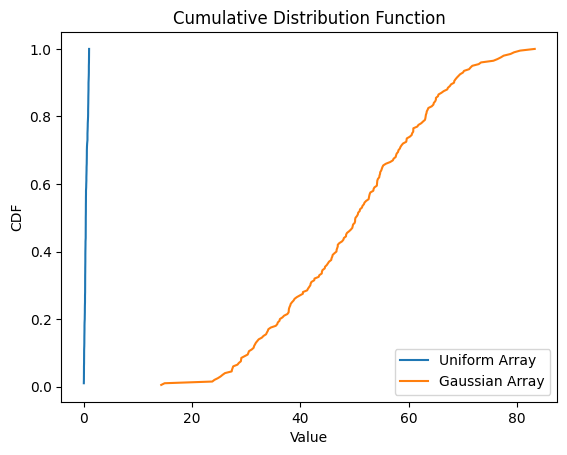

In [10]:
with open("random_data.bin", "wb") as f:
    np.save(f, uniform_array)
    np.save(f, gaussian_array)

with open("random_data.bin", "rb") as f:
    uniform_array_read = np.load(f)
    gaussian_array_read = np.load(f)

def plot_cdf(data, label):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, cdf, label=label)

plot_cdf(uniform_array_read, "Uniform Array")
plot_cdf(gaussian_array_read, "Gaussian Array")
plt.title("Cumulative Distribution Function")
plt.xlabel("Value")
plt.ylabel("CDF")
plt.legend()
plt.show()


Cumulative Distribution Function (CDF):

The CDF provides a way to visualize the cumulative probability up to a given value:
Uniform Array CDF:
The uniform array's CDF shows a linear progression, indicating a constant rate of increase across the range.
This matches the uniform distribution where values are evenly spread.
Gaussian Array CDF:
The Gaussian array’s CDF has an "S" shape:
A slow increase at the extremes.
A steep increase near the center (mean) of the Gaussian distribution.


4.

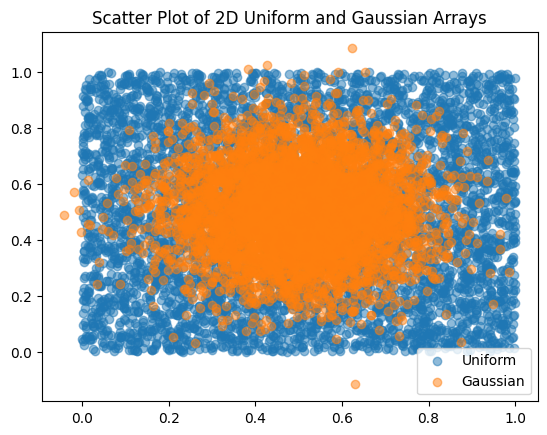

In [11]:
uniform_2d = np.random.uniform(0, 1, (5000, 2))
gaussian_2d = np.random.normal(loc=0.5, scale=0.15, size=(5000, 2))

plt.scatter(uniform_2d[:, 0], uniform_2d[:, 1], alpha=0.5, label="Uniform")
plt.scatter(gaussian_2d[:, 0], gaussian_2d[:, 1], alpha=0.5, label="Gaussian")
plt.title("Scatter Plot of 2D Uniform and Gaussian Arrays")
plt.legend()
plt.show()


**Uniform Sampling (Blue Dots)**: Evenly spread across [0,1]×[0,1], no clustering.

**Gaussian Sampling (Orange Dots)**: Dense in the center, gradually decreasing outward.

**Key Difference**: Uniform covers the whole space, Gaussian clusters around the center.

**Observation**: Some Gaussian points may fall outside the boundaries.

4a.

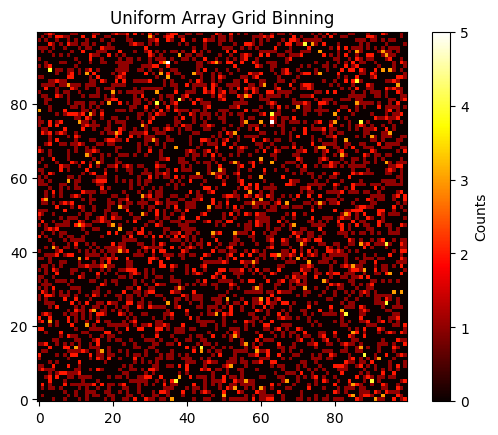

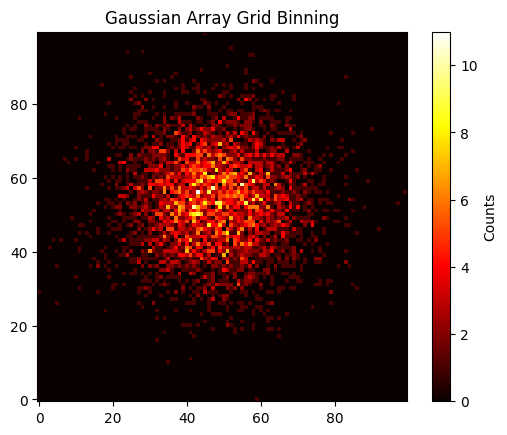

In [ ]:
uniform_grid, _, _ = np.histogram2d(uniform_2d[:, 0], uniform_2d[:, 1], bins=100)
gaussian_grid, _, _ = np.histogram2d(gaussian_2d[:, 0], gaussian_2d[:, 1], bins=100)

plt.imshow(uniform_grid.T, origin="lower", cmap="hot")
plt.title("Uniform Array Grid Binning")
plt.colorbar(label="Counts")
plt.show()

plt.imshow(gaussian_grid.T, origin="lower", cmap="hot")
plt.title("Gaussian Array Grid Binning")
plt.colorbar(label="Counts")
plt.show()


**Top Graph (Uniform Grid Binning)**: Even distribution, no clear pattern, roughly equal density across the grid.

**Bottom Graph (Gaussian Grid Binning)**: High density in the center, gradually decreasing outward, forming a bright central region.

**Key Difference**: Uniform points spread evenly, Gaussian points cluster in the center.

4b.

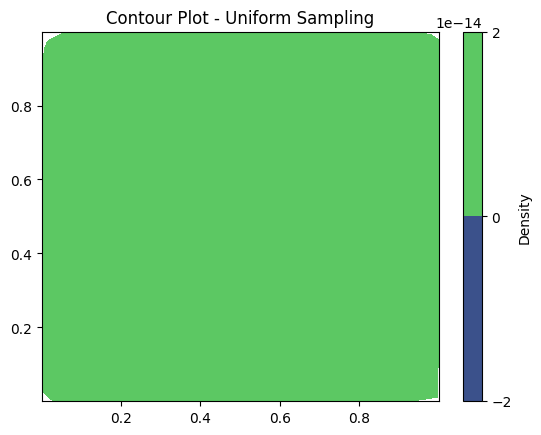

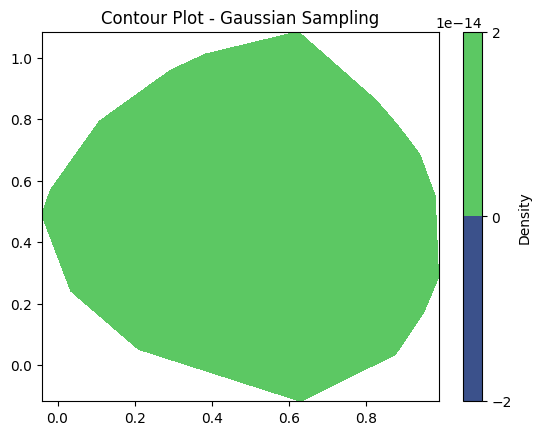

In [12]:
plt.tricontourf(uniform_2d[:, 0], uniform_2d[:, 1], np.zeros(5000), levels=10, cmap="viridis")
plt.title("Contour Plot - Uniform Sampling")
plt.colorbar(label="Density")
plt.show()

plt.tricontourf(gaussian_2d[:, 0], gaussian_2d[:, 1], np.zeros(5000), levels=10, cmap="viridis")
plt.title("Contour Plot - Gaussian Sampling")
plt.colorbar(label="Density")
plt.show()


**Contour** **Plots**

Uniform Sampling (Top Plot):
Uniform sampling leads to evenly distributed points in a 2D plane.
The contour plot is uniform, with no significant density changes, as expected.

Gaussian Sampling (Bottom Plot):
Gaussian sampling creates a higher density of points near the mean in the 2D plane.
The contour plot reveals clustered regions of higher density, which decrease outward.


# **Part 2**

**1.**

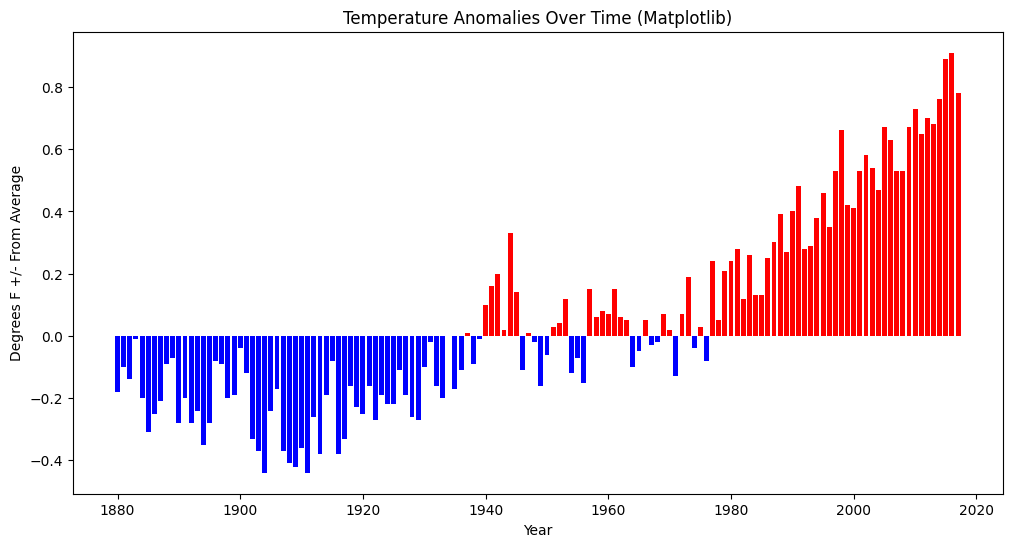

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'NOAA-Temperatures.csv'
cleaned_data = pd.read_csv(file_path, skiprows=4, names=["Year", "Value"], header=0)
cleaned_data = cleaned_data.dropna()

cleaned_data["Year"] = cleaned_data["Year"].astype(int)
cleaned_data["Value"] = cleaned_data["Value"].astype(float)

colors = ["red" if val > 0 else "blue" for val in cleaned_data["Value"]]

plt.figure(figsize=(12, 6))
plt.bar(cleaned_data["Year"], cleaned_data["Value"], color=colors)
plt.xlabel("Year")
plt.ylabel("Degrees F +/- From Average")
plt.title("Temperature Anomalies Over Time (Matplotlib)")
plt.show()

<ipython-input-3-5d211f8ab702>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Year", y="Value", palette=colors, data=cleaned_data)


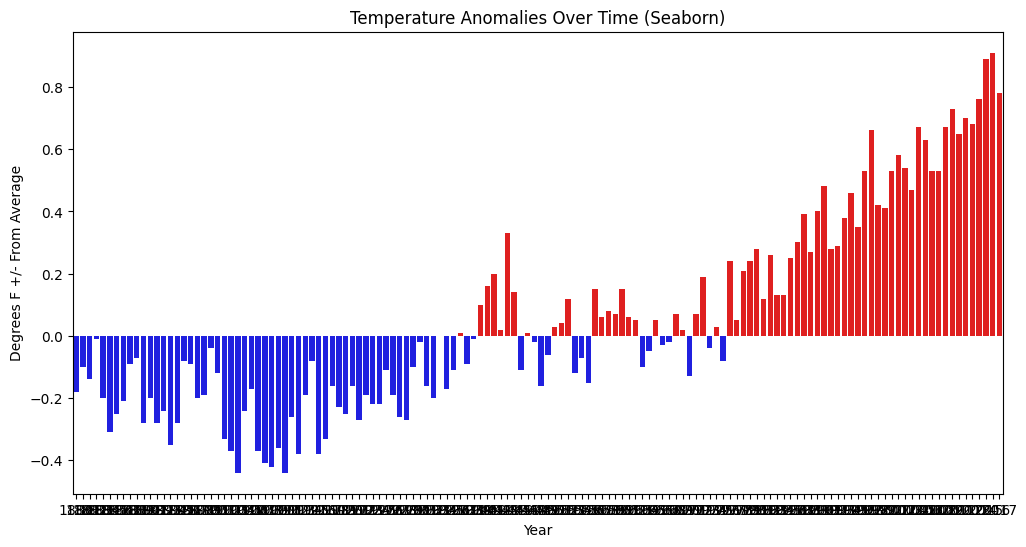

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Year", y="Value", palette=colors, data=cleaned_data)
plt.xlabel("Year")
plt.ylabel("Degrees F +/- From Average")
plt.title("Temperature Anomalies Over Time (Seaborn)")
plt.show()

***The data shows a clear trend of increasing positive temperature anomalies over time. In the earlier years (before 1940), negative anomalies (blue bars) dominate, indicating cooler-than-average temperatures. However, from the mid-20th century onward, there is a noticeable shift, with red bars (positive anomalies) becoming more frequent and prominent. This suggests a long-term warming trend, especially in recent decades where positive anomalies have grown significantly larger, reflecting global temperature increases.***

**2.**

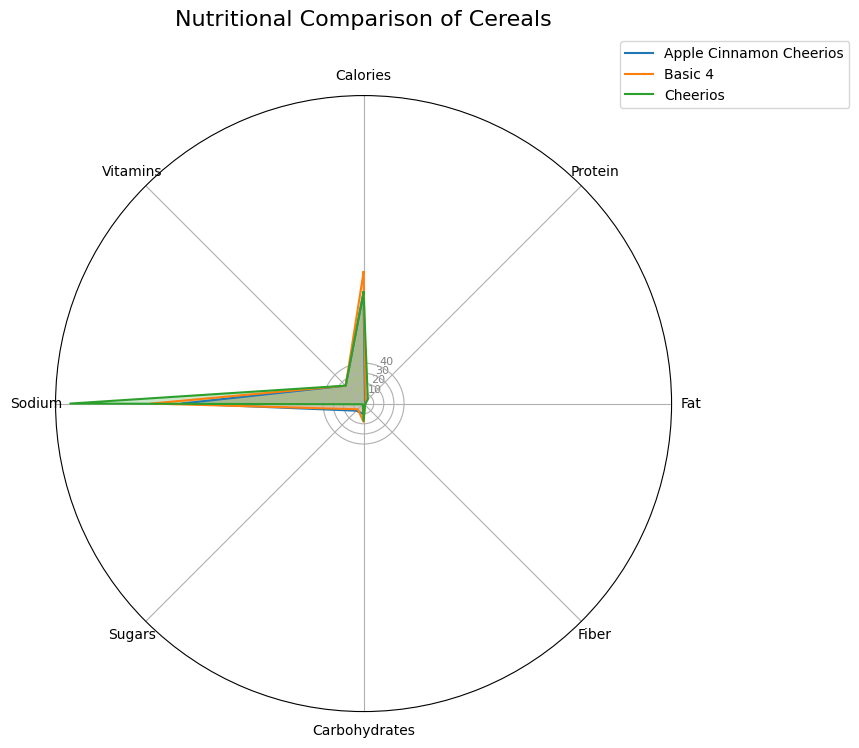

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = 'Breakfast-Cereals.xls'
data = pd.read_excel(file_path)


cereals = data.iloc[:3]
categories = ['Calories', 'Protein', 'Fat', 'Fiber', 'Carbohydrates', 'Sugars', 'Sodium', 'Vitamins']

cereal_names = cereals['Cereal']
stats = cereals[categories].values

num_vars = len(categories)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, cereal in enumerate(cereal_names):
    values = stats[i].tolist()
    values += values[:1]
    ax.plot(angles, values, label=cereal)
    ax.fill(angles, values, alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_yticks([10, 20, 30, 40])
ax.set_yticklabels(['10', '20', '30', '40'], color="grey", size=8)
ax.set_title('Nutritional Comparison of Cereals', size=16, y=1.1)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


**Chart Type:** Radar (Star) Chart comparing 3 cereals across 8 nutritional categories.

**Cereals Compared:** Apple Cinnamon Cheerios, Basic 4, and Cheerios.

**Key Observations:**


*   Sodium is significantly higher than other nutrients.

*   Calories, Protein, Carbohydrates have moderate values.
*   Vitamins, Fiber, Fat, and Sugars are relatively low.


**Purpose:** Highlights nutritional differences among cereals in a visual format.

**3.**

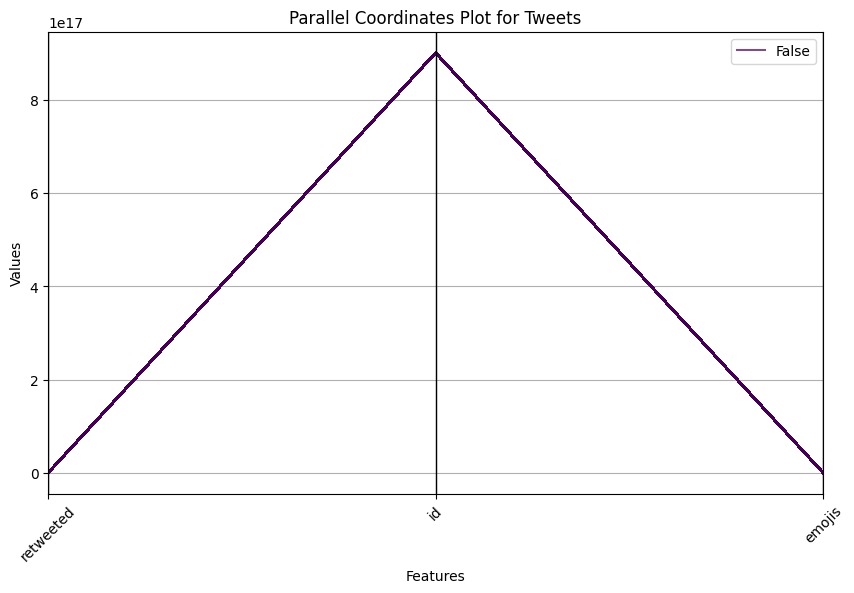

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import pandas as pd

tweets_df = pd.read_csv('tweets.csv')

tweets_df_filtered = tweets_df[['retweeted', 'id', 'emojis']].copy()
tweets_df_filtered['color_feature'] = tweets_df['retweeted']

plt.figure(figsize=(10, 6))
parallel_coordinates(tweets_df_filtered, 'color_feature', colormap='viridis', alpha=0.7)

plt.title('Parallel Coordinates Plot for Tweets')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


1. Understanding the Axes:
The plot visualizes three features: retweeted, id, and emojis.
Each line represents a tweet and how its values for these features change across the axes.
The color is based on the retweeted column, which is a boolean (True/False).
2. Observations:
ID values dominate the scale: The id column has extremely large numerical values (Twitter IDs are typically very large numbers). This makes the plot look like an inverted "V" shape, as id is significantly larger than retweeted and emojis.
Low variance in retweeted and emojis: The lines remain quite close at retweeted and emojis, suggesting that these values do not vary as much compared to the ID numbers.
Possible correlations: Since retweeted is a binary feature, it likely doesn’t contribute significantly to the variation seen in the plot. If most tweets are not retweeted (False), the color feature may not show significant differentiation.
3. Possible Adjustments for Better Insights:
Normalization: Scaling id to a smaller range might help avoid the large numerical gap distorting the visualization.
Feature selection: Using more meaningful numerical features (e.g., number of retweets, length of text) might provide better insights.
Color variation: Since the color is based on retweeted, but it's mostly False, we may not see much contrast in color. Using another feature for coloring (like tweet length) might reveal more trends.

**Conclusion**:
The graph suggests that most tweets in the dataset are not retweeted (as indicated by the color clustering). Additionally, since the id column is disproportionately large, it dominates the visualization. To gain more insights, refining feature selection and normalization could improve readability.

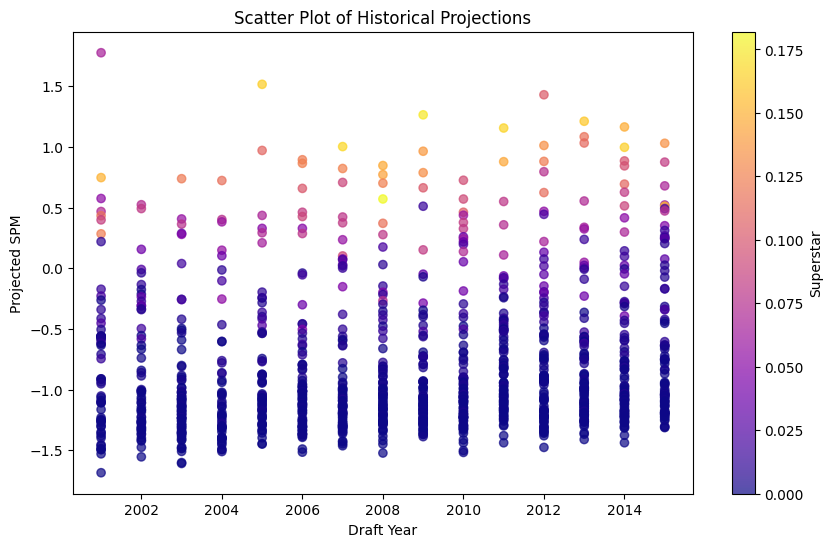

In [ ]:
projections_df = pd.read_csv('historical_projections.csv')
x_column = 'Draft Year'
y_column = 'Projected SPM'
color_column = 'Superstar'

plt.figure(figsize=(10, 6))
scatter = plt.scatter(projections_df[x_column], projections_df[y_column],
                       c=projections_df[color_column], cmap='plasma', alpha=0.7)

plt.colorbar(scatter, label=color_column)
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title('Scatter Plot of Historical Projections')
plt.show()


Explanation of the Scatter Plot:


*   X-axis (Draft Year): Represents the year in which the player was drafted.

*  Y-axis (Projected SPM - Statistical Plus/Minus): Represents a projection of a player's impact on the game.


*   Color (Superstar Probability): Represents the likelihood of a player becoming a superstar, with the color gradient from dark blue (low probability) to yellow (high probability).


Observed Trends:


1.   Majority of Players Have Low Superstar Probability:

    *   
Most data points are in dark blue/purple shades, indicating a low probability of becoming a superstar.
    *   A few standout yellow points represent players projected to have high superstar potential.



2.   Higher Projected SPM Often Correlates with Higher Superstar Probability:

    *   Players with a high Projected SPM (above 0.5) tend to have warmer colors (pink, orange, or yellow), indicating a greater chance of superstardom.


3.   Distribution Remains Consistent Across Draft Years:
    *   
Every draft year has a wide spread of Projected SPM, but only a handful of players in each class are projected to be elite.



4.  Outliers:
    *  Some players (likely top draft picks) have exceptionally high Projected SPM (>1.5) and are bright yellow, signifying a strong superstar likelihood.














# **Part 3**

**1. Importance of Assessing the Value of Visualizations**

Assessing the value of visualizations is crucial because it helps determine their effectiveness in conveying information, improving decision-making, and enhancing user understanding. Without proper assessment, a visualization may be misleading, inefficient, or fail to provide actionable insights.

Two Measures for Deciding the Value of Visualizations:

*   Effectiveness: How well the visualization helps users gain insights and make informed decisions.
*   Efficiency: The speed and ease with which users can extract meaningful information from the visualization.




**2. Mathematical Model for the Visualization Block in Fig.1**

The visualization block in the figure consists of a data component D, a visualization process V, and a support system S. The model can be represented as follows:



*   Input Data (D) is transformed by the visualization process (V) into an information stream (I).
*   Support System (S) influences the visualization process and contributes to the rate of change of the user's understanding (dS/dt).


*   The user interacts with the visualization, forming perceptions (P) and gaining knowledge (K).
*  Knowledge accumulation is modeled by dK/dt, which depends on perception (P) and the effectiveness of the visualization.






**3. Four Parameters Describing Costs of Visualization Techniques**



1.  Computational Cost: The processing power and time required to generate and render the visualization.
2.   Cognitive Load: The mental effort users must invest to interpret the visualization correctly.
3.   Implementation Cost: The resources needed to develop and maintain the visualization system.
4.   Interaction Cost: The effort required for users to navigate and manipulate the visualization.







 **4. Pros and Cons of Interactivity in Visualizations**

 **Pros:**
*   Enhances user engagement and exploration.
*   Allows dynamic filtering and zooming for better insights.
*   Adapts to different user needs and preferences.
*   Can reveal hidden patterns and relationships.

**Cons:**
*   Higher computational and design complexity.
*   Increased cognitive load if not designed intuitively.
*   Potential for misinterpretation due to excessive manipulation.
*   Can lead to slower decision-making if users get overwhelmed.





# **Part 4**

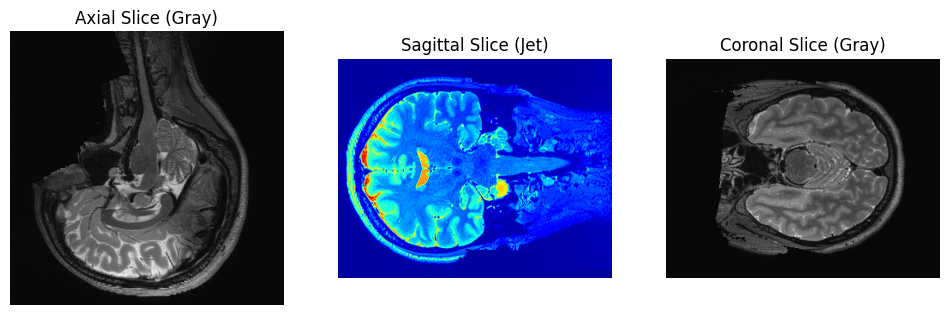

In [5]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

file_path = "T2.nii"
img = nib.load(file_path)
data = img.get_fdata()

slice_x = data.shape[0] // 2
slice_y = data.shape[1] // 2
slice_z = data.shape[2] // 2

slice_axial = data[:, :, slice_z]
slice_sagittal = data[slice_x, :, :]
slice_coronal = data[:, slice_y, :]

colormap1 = "gray"
colormap2 = "jet"

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(np.rot90(slice_axial), cmap=colormap1)
axes[0].set_title("Axial Slice (Gray)")

axes[1].imshow(np.rot90(slice_sagittal), cmap=colormap2)
axes[1].set_title("Sagittal Slice (Jet)")

axes[2].imshow(np.rot90(slice_coronal), cmap=colormap1)
axes[2].set_title("Coronal Slice (Gray)")

for ax in axes:
    ax.axis("off")

plt.savefig("slices.png", dpi=300)
plt.show()


**Explanation of Colormap Choice:**

Grayscale ("gray") provides a natural way to observe medical images since it preserves intensity relationships.

Jet ("jet") enhances contrast by mapping intensities to different colors, which can help highlight structures but may introduce perceptual distortions.

# **Part 5**

**Comparison of Results**


*   Colormaps: Different colormaps emphasize distinct aspects of the data. For example, gray is better for contrast, while viridis highlights gradients effectively.

*   2D Sampling: Uniform sampling ensures even coverage across the space, while Gaussian sampling clusters points around the mean, making it useful for modeling natural distributions.

*   Grid Binning: The uniform dataset had an even spread in the heatmap, while the Gaussian dataset showed a high concentration in the center.
*   Radar Chart Insights: The radar chart highlighted sodium as the most dominant nutrient, overshadowing others. This visualization helped quickly compare the cereals' nutritional profiles.
*   Interactivity: While interactive visualizations offer deeper exploration, they come with additional computational costs and require user familiarity.


**Challenges Faced**


*   Handling Large Datasets: Working with large datasets (e.g., MRI or .xls files) required optimizing memory usage and choosing efficient data processing methods.
*   File Compatibility Issues: The provided .xls file caused some issues during reading, requiring adjustments in parsing methods.
*   Choosing the Right Visualization: Deciding which visualization best represented the data was sometimes challenging, especially when comparing multiple variables.
*   Data Distribution Misinterpretation: Initially, the Gaussian distribution’s clustering effect made it seem like there were fewer points compared to the uniform dataset, requiring careful analysis.
*   Library Learning Curve: Learning specialized libraries like nibabel for NIfTI files and ensuring proper implementation of matplotlib’s advanced features took time.


**Key Learnings**


*   Developed a better understanding of how different random sampling methods impact data distribution and visualization.

*   Learned the significance of grid binning when analyzing large 2D datasets.

*   Gained experience in handling and visualizing real-world data using Python libraries (matplotlib, seaborn, numpy, pandas).

*   Understood how to interpret radar charts effectively to compare multiple variables at once.
*   Improved problem-solving skills when dealing with file format inconsistencies.


*   Recognized the trade-offs between static and interactive visualizations and when to use each.


*   Explored nibabel for handling NIfTI files, which is essential for processing neuroimaging data.


**References**

*   Python Data Visualization Libraries: matplotlib, seaborn, plotly

*   Sampling Techniques: Understanding Uniform vs. Gaussian Distributions
*   Handling .xls Files: Pandas Documentation on read_excel()
*   nibabel Documentation: Working with NIfTI and other medical imaging formats








